Stage 1

In [287]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score 

In [288]:
first_df = pd.read_csv("first.csv")
first_df

,Unnamed: 0,key,x,y,result
0,0,1,-0.515258,0.601255,False
1,1,1,0.442515,0.883295,True
2,2,1,-0.412906,0.154696,False
3,3,1,0.485963,-0.782856,False
4,4,1,0.223733,0.254806,True
...,...,...,...,...,...
995,995,1,-0.383606,-0.480100,True
996,996,1,0.381912,0.920676,True
997,997,1,0.795897,-0.085877,False
998,998,1,0.716176,0.240112,True


In [289]:
def extract_X_Y(df) :
    X = df [["x", "y"]].values
    Y = df ["result"].values
    return X, Y

In [290]:
X, Y = extract_X_Y(first_df)

In [291]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)


In [292]:
def model_evaluation(y_test, y_pred) :
    print('Trained Model Test Data Accuracy Score :',accuracy_score(y_test, y_pred)*100)
    testacc=accuracy_score(y_test, y_pred)
    testrecall=recall_score(y_test, y_pred)
    testprecision=precision_score(y_test, y_pred)
    print(' ')
    print(classification_report(y_test, y_pred))
    return testacc, testrecall, testprecision

In [293]:
def create_eval_df(df, classifier) :
    eval_df = df.copy()
    eval_df["predict"] = classifier.predict(X)
    eval_df["correct"] = eval_df["predict"] == eval_df["result"]
    eval_df["correctandtrue"] = eval_df["predict"].isin([True]) & eval_df["result"].isin([True])
    return eval_df

In [294]:
#evaluate with Null Model
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
dummy_eval_df = create_eval_df(first_df, dummy_clf)


Trained Model Test Data Accuracy Score : 51.74999999999999
 
              precision    recall  f1-score   support

       False       0.47      0.60      0.53       179
        True       0.58      0.45      0.51       221

    accuracy                           0.52       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.53      0.52      0.52       400



In [295]:
## Create Function to Print Results
def get_results(x1):
    print("\n{0:20}   {1:4}    {2:4}    {3:4}    {4:4}".format('Model','Train','Accuracy', 'Recall','Precision'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4}    {3:<6.4}    {4:<6.4}".format(i,x1[i][0],x1[i][1],x1[i][2],x1[i][3]))

In [296]:
## Create dict to store all these results:
result_scores = {}
## Score the Model on Training and Testing Set
result_scores['Dummy'] = \
            (sklearn.metrics.accuracy_score(y_train,dummy_clf.predict(X_train)),
             testacc, testprecision, testrecall)

In [297]:
def show_results(_X, _YT, _YP, title) :
    #plot Training TEST data predictions
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex='none', figsize=(16,6))
    f.suptitle(title)

    ax1.scatter(_X[:, 0], _X[:, 1], c=_YT, facecolor='white', alpha=0.5)
    ax1.set_xlim(left=-1.0, right=1.0)
    ax1.set_ylim(bottom=-1.0, top=1.0)
    ax1.set_title("Test")

    ax2.scatter(_X[:, 0], _X[:, 1], c=_YP, facecolor='white', alpha=0.5)
    ax2.set_xlim(left=-1.0, right=1.0)
    ax2.set_ylim(bottom=-1.0, top=1.0)
    ax2.set_title("Prediction")

    ax3.scatter(_X[:, 0], _X[:, 1], c=_YP.astype(int) - _YT.astype(int), facecolor='white', alpha=0.5)
    ax3.set_xlim(left=-1.0, right=1.0)
    ax3.set_ylim(bottom=-1.0, top=1.0)
    ax3.set_title("Comparison")


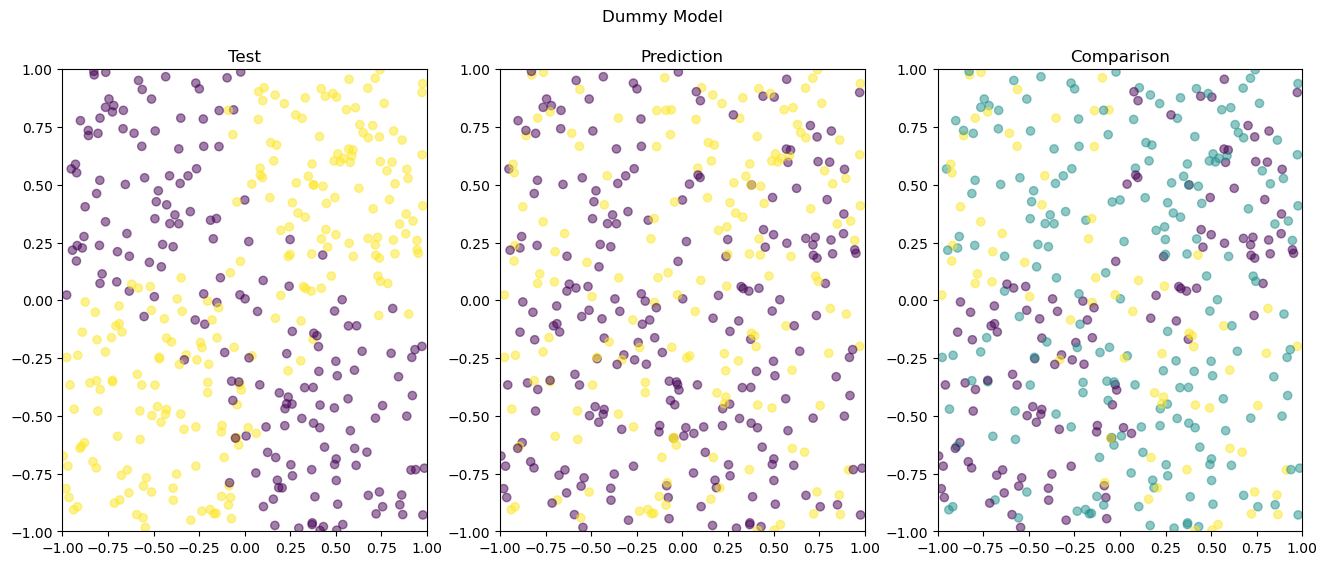

In [298]:
show_results(X_test, y_test, y_pred, 'Dummy Model')




Stage 2

In [300]:
#establish and fit KNN model
k=15
classifier = KNeighborsClassifier(n_neighbors=k)  
classifier.fit(X_train, y_train)
    
#make test predictions
y_pred = classifier.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

first_eval_df = create_eval_df(first_df, classifier)

## Score the Model on Training and Testing Set
result_scores['KNN-1'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 90.5
 
              precision    recall  f1-score   support

       False       0.88      0.91      0.90       179
        True       0.93      0.90      0.91       221

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



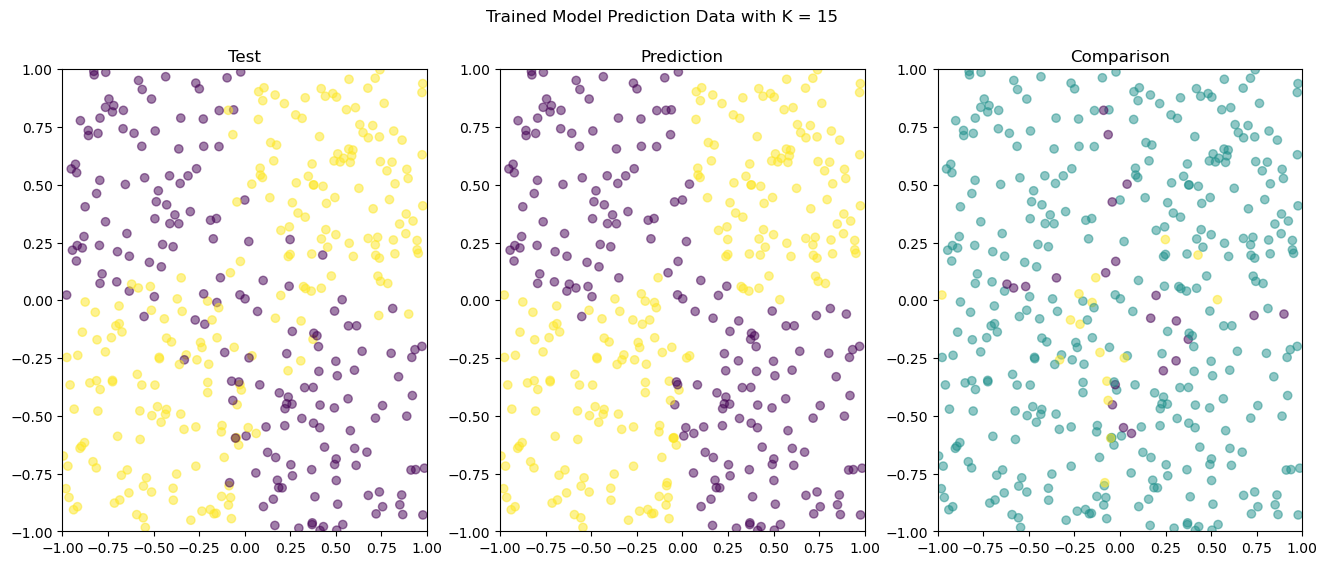

In [301]:
show_results(X_test, y_test, y_pred, 'Trained Model Prediction Data with K = {}'.format(k))


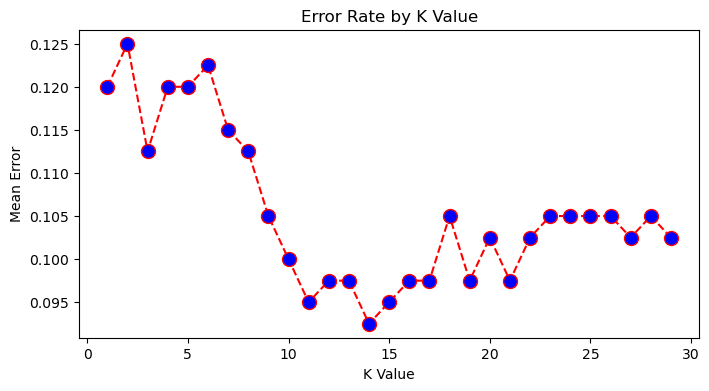

In [302]:
#plot to validate choice of k
error = []
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8, 4))
ax=plt.axes()
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.title('Error Rate by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

Stage 3

In [304]:
second_df = pd.read_csv("second.csv")
X, Y = extract_X_Y(second_df)
y_pred = classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)

second_eval_df = create_eval_df(second_df, classifier)

## Score the Model on Training and Testing Set
result_scores['KNN-2'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)


Trained Model Test Data Accuracy Score : 89.9
 
              precision    recall  f1-score   support

       False       0.89      0.91      0.90       503
        True       0.91      0.89      0.90       497

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



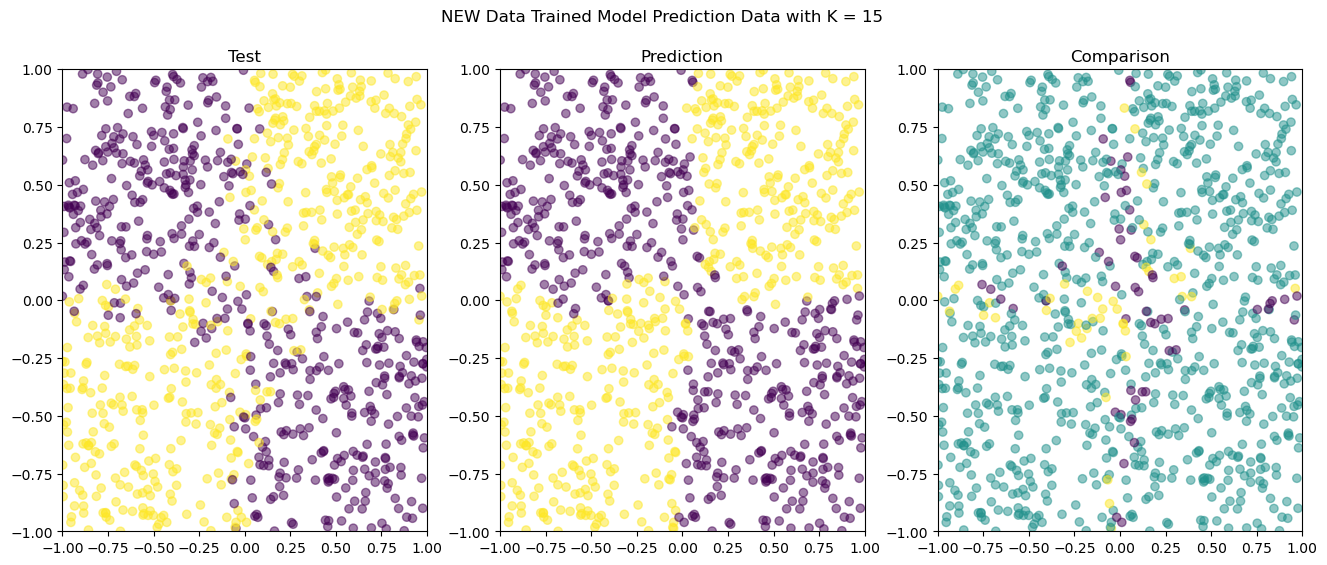

In [305]:
show_results(X, Y, y_pred, 'NEW Data Trained Model Prediction Data with K = {}'.format(k))

Stage 4

In [307]:
third_df = pd.read_csv("third.csv")
X, Y = extract_X_Y(third_df)
y_pred = classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)
third_eval_df = create_eval_df(third_df, classifier)
## Score the Model on Training and Testing Set
result_scores['KNN-3-1'] = \
            (sklearn.metrics.accuracy_score(y_train,classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 74.7
 
              precision    recall  f1-score   support

       False       1.00      0.68      0.81       801
        True       0.44      1.00      0.61       199

    accuracy                           0.75      1000
   macro avg       0.72      0.84      0.71      1000
weighted avg       0.89      0.75      0.77      1000



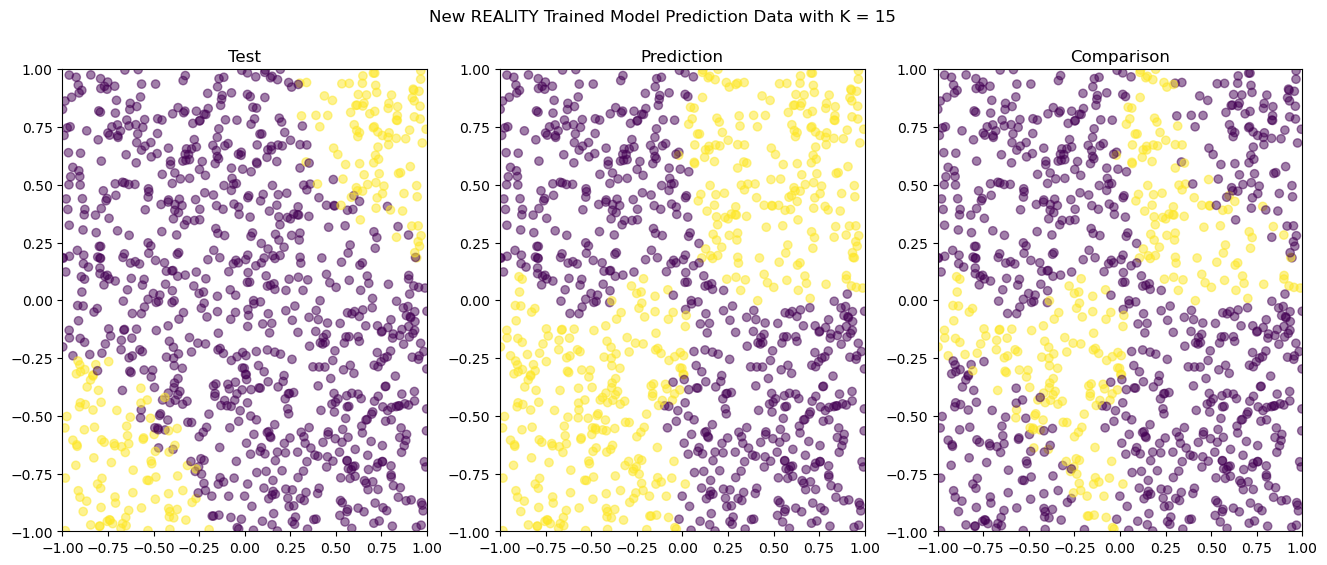

In [308]:
show_results(X, Y, y_pred, 'New REALITY Trained Model Prediction Data with K = {}'.format(k))

In [309]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

new_classifier = KNeighborsClassifier(n_neighbors=k)  
new_classifier.fit(X_train, y_train)
    
#make test predictions
y_pred = new_classifier.predict(X_test)
testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)

## Score the Model on Training and Testing Set
result_scores['KNN-3-2'] = \
            (sklearn.metrics.accuracy_score(y_train,new_classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 95.75
 
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       320
        True       0.93      0.85      0.89        80

    accuracy                           0.96       400
   macro avg       0.95      0.92      0.93       400
weighted avg       0.96      0.96      0.96       400



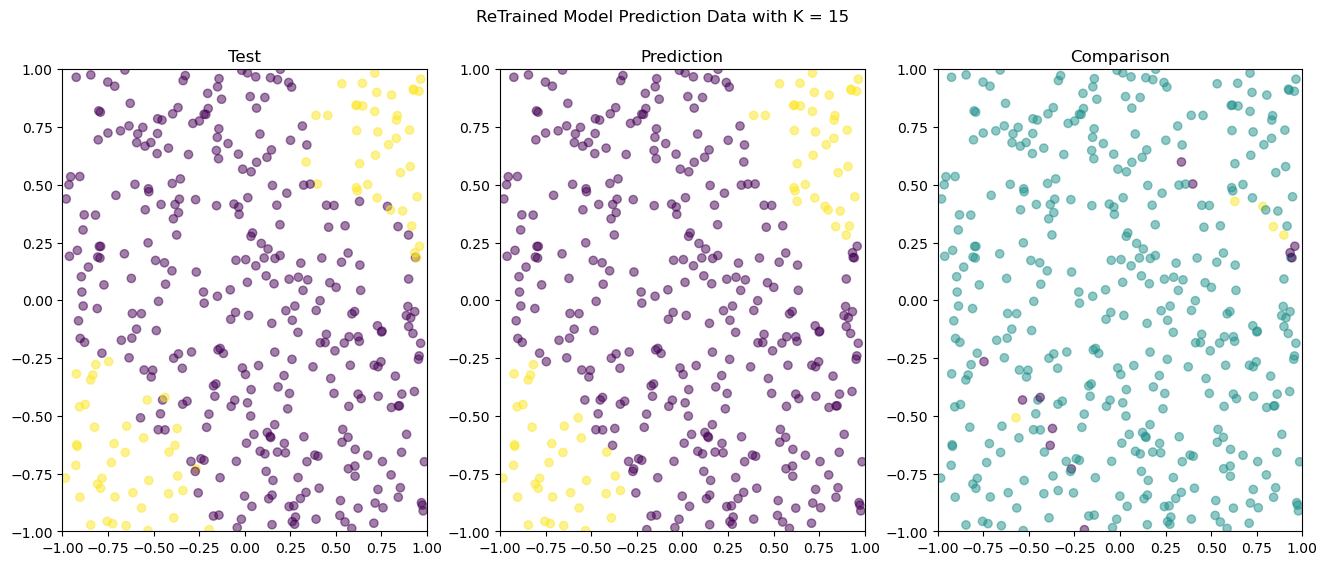

In [310]:
show_results(X_test, y_test, y_pred, 'ReTrained Model Prediction Data with K = {}'.format(k))

Stage 5

In [312]:
fourth_df = pd.read_csv("fourth.csv")
X, Y = extract_X_Y(fourth_df)
y_pred = new_classifier.predict(X)
testacc, testrecall, testprecision = model_evaluation(Y, y_pred)
fourth_eval_df = create_eval_df(fourth_df, classifier)
## Score the Model on Training and Testing Set
result_scores['KNN-2'] = \
            (sklearn.metrics.accuracy_score(y_train,new_classifier.predict(X_train)),
             testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 96.5
 
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       755
        True       0.96      0.89      0.93       245

    accuracy                           0.96      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



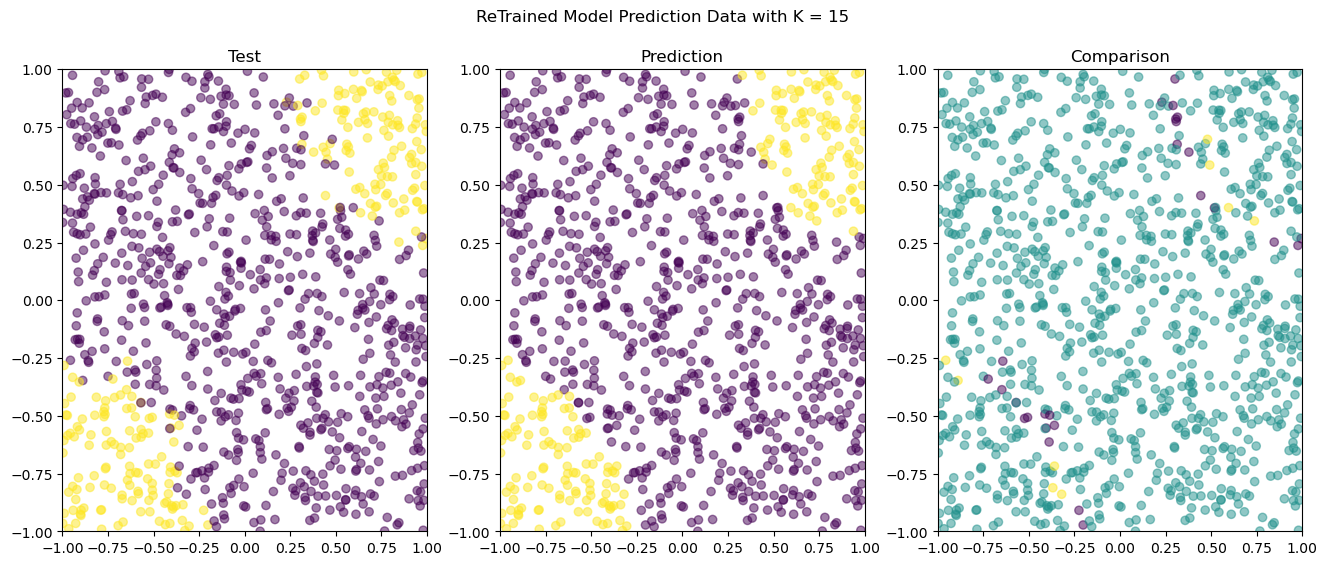

In [313]:
show_results(X, Y, y_pred, 'ReTrained Model Prediction Data with K = {}'.format(k))


In [314]:
#create model performance data
def createModelPerformanceData(df_array) :
    x=[]
    y=[]
    z=[]
    q=[]
    t=[]
    count=0
    correct=0
    countpredtrue=0.001
    correctandpredtrue=0
    true=.001
    for df in df_array :
        for index, row in dummy_eval_df.iterrows():
            count=count+1
            x.append(count)
            correct=correct + row['correct']
            y.append(correct)
            countpredtrue=countpredtrue + row['predict']
            q.append(countpredtrue)
            correctandpredtrue=correctandpredtrue + row['correctandtrue']
            z.append(correctandpredtrue)
            true=true + row['result']
            t.append(true)
    return x, y, q, z, t, count, countpredtrue, true   

In [315]:
def graph_model_performance(x, y, q, z, t, count, countpredtrue, true):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex='none', figsize=(16,6))
    f.suptitle('Model Performance')
    ax1.set_title('Accuracy (are predictions correct?)')
    ax1.scatter(x,y)
    ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')

    ax2.set_title('Recall (find all actual positives?)')
    ax2.scatter(t,z)
    ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')

    ax3.set_title('Precision (are positive predictions correct?)')
    ax3.scatter(q,z)
    ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')

C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


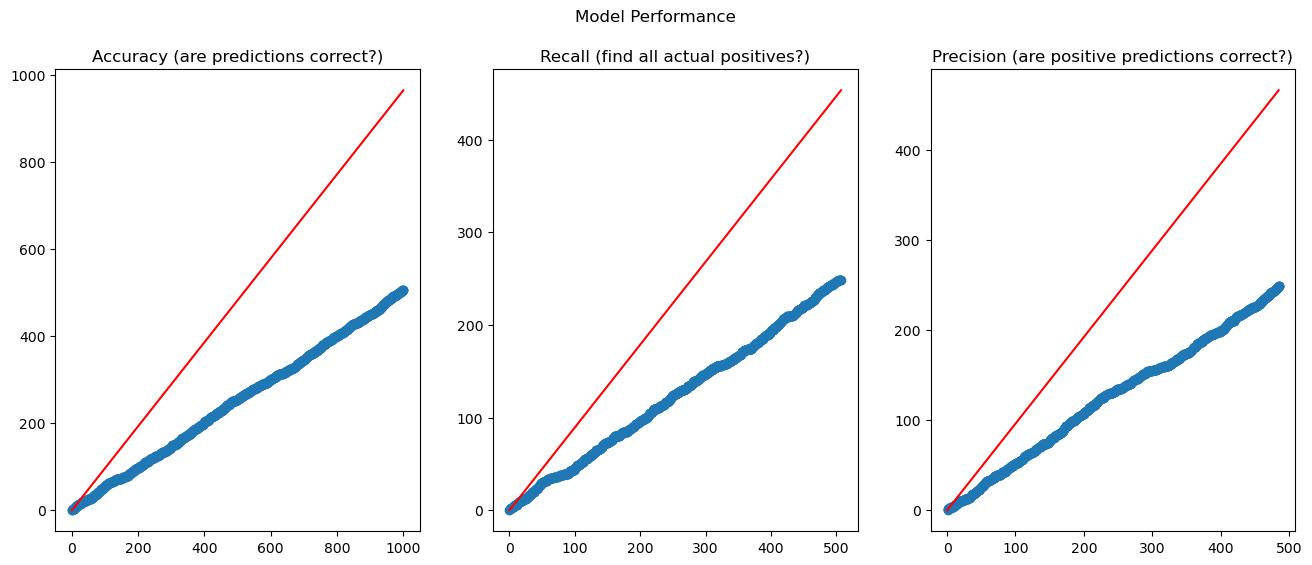

In [316]:
x, y, q, z, t, count, countpredtrue, true   = createModelPerformanceData([dummy_eval_df])
graph_model_performance(x, y, q, z, t, count, countpredtrue, true   )

C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
C:\Users\supra\AppData\Local\Temp\ipykernel_55512\1704089774.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


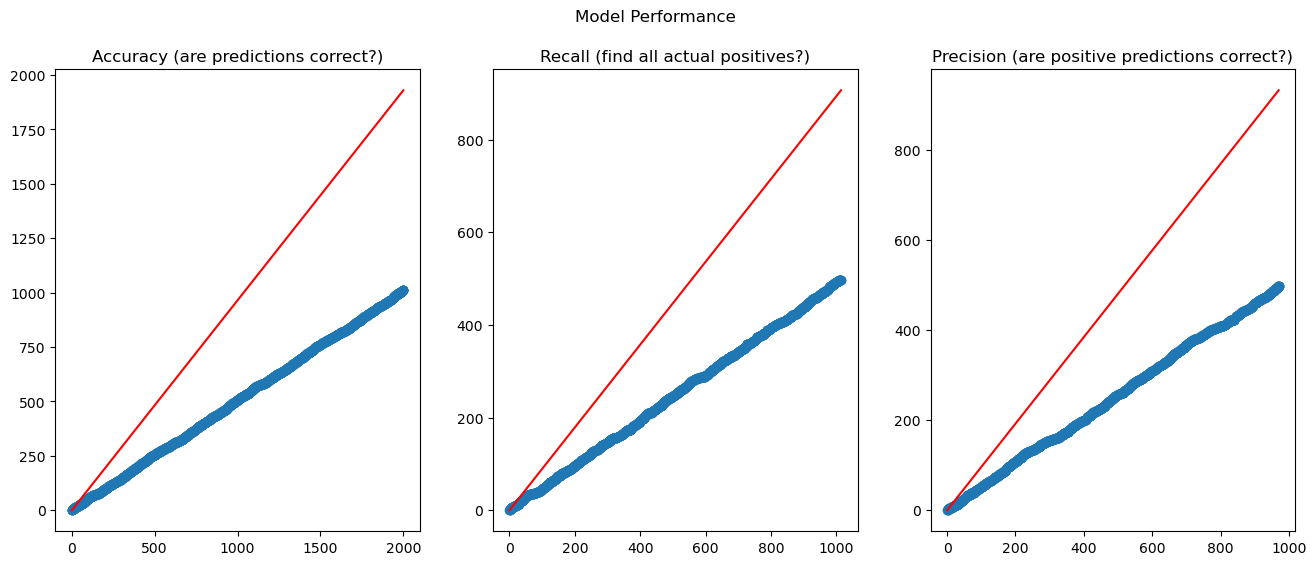

In [317]:
x, y, q, z, t, count, countpredtrue, true   = createModelPerformanceData([first_eval_df, second_eval_df])#, third_eval_df, fourth_eval_df])
graph_model_performance(x, y, q, z, t, count, countpredtrue, true   )

In [318]:
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.49     0.5175    0.5814    0.4525
KNN-1                  0.9017   0.905     0.9256    0.9005
KNN-2                  0.97     0.965     0.9605    0.8939
KNN-3-1                0.9017   0.747     0.4403    1.0   
KNN-3-2                0.97     0.9575    0.9315    0.85  


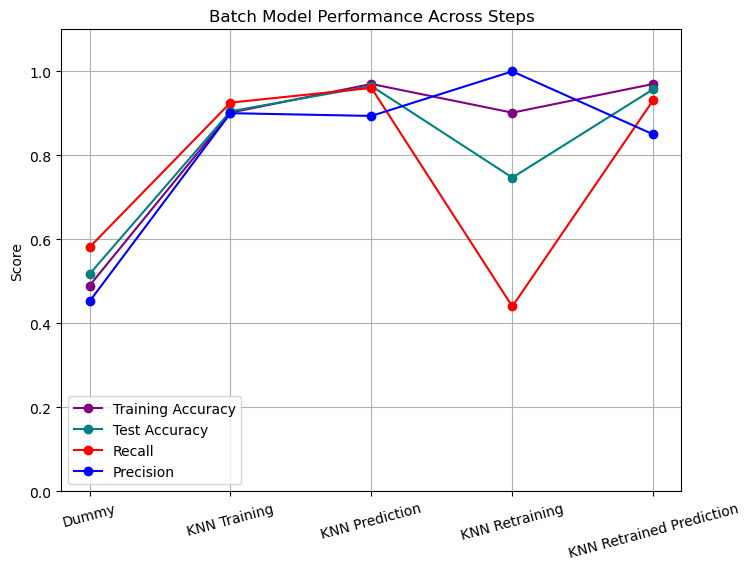

In [352]:
performance_df = pd.DataFrame(result_scores).T
performance_df.columns = ["Training Accuracy", "Test Accuracy", "Recall", "Precision"]
performance_df.index.name = "Model"

# Define custom order and labels for clarity
step_order = ['Dummy', 'KNN-1', 'KNN-2', 'KNN-3-1', 'KNN-3-2']
step_labels = [
    'Dummy',
    'KNN Training',
    'KNN Prediction',
    'KNN Retraining',
    'KNN Retrained Prediction'
]
performance_df = performance_df.loc[step_order]
performance_df.index = step_labels

# Define colors for each metric
metric_colors = {
    "Training Accuracy": "purple",
    "Test Accuracy": "teal",
    "Recall": "red",
    "Precision": "blue"
}

# Plot
plt.figure(figsize=(8, 6))
for metric, color in metric_colors.items():
    plt.plot(
        performance_df.index,
        performance_df[metric],
        label=metric,
        color=color,
        linestyle='-',
        marker='o',
        markersize=6,
        markerfacecolor=color
    )

plt.ylabel("Score")
plt.title("Batch Model Performance Across Steps")
plt.xticks(rotation=15)
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

**Interpretation:** The plot illustrates the performance of a batch model across various development stages, highlighting key metrics such as training accuracy, test accuracy, recall, and precision. Starting from a low-performing dummy baseline, all metrics significantly improve during the initial KNN training phase, indicating good model fit. In the prediction step, performance remains high with a slight dip in precision, suggesting reasonable generalization. However, during KNN retraining, recall drops sharply while precision peaks, implying the model became overly conservative correct when it predicts positives but missing many true positives. This suggests a potential issue like data imbalance or overfitting to the retrained data. In the final step, KNN retrained prediction, all metrics recover to high values, with training and test accuracy, recall, and precision achieving a balanced and robust performance. 